In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import random
from wordcloud import WordCloud, STOPWORDS


## Load dataset

In [90]:
path_balanced = '.\\final_processed_data2.csv'

df_balanced = pd.read_csv(path_balanced)

In [91]:
df_balanced['label'] = df_balanced['label'].replace(4, 2)

Function

In [92]:
#Tìm các từ trong pattern với comments label 1
def find_words_1(sentence):
  pattern = r'\b(lồn|đéo|đụ|cặc|moẹ|địt|mịa|má|cức|quần què)\b'
  matches = re.findall(pattern, sentence)
  
  return matches

#Tìm các từ trong pattern với comments label 3
def find_words_3(sentence):
  pattern = r'\b(bắc kì|bắc kỳ|trung kì|trung kỳ|nam kì|nam kỳ)\b'
  matches = re.findall(pattern, sentence)
  
  return matches

#Đếm số lần xuất hiện của các từ trong pattern
def count_words_in_pattern(df, pattern_column):
  all_words = df[pattern_column].explode()  
  word_counts = all_words.value_counts()  
  
  return word_counts

### Balanced dataset

Split dataset by label value

In [93]:
df_balanced_0 = df_balanced[df_balanced['label'] == 0].copy()
df_balanced_1 = df_balanced[df_balanced['label'] == 1].copy()
df_balanced_2 = df_balanced[df_balanced['label'] == 2].copy()
df_balanced_3 = df_balanced[df_balanced['label'] == 3].copy()
#df_balanced_4 = df_balanced[df_balanced['label'] == 4].copy()

#### a. Percentage of each class

In [94]:
df_balanced_count_values = df_balanced['label'].value_counts()
df_balanced_count_values


label
0    4989
2    1843
3     927
1     752
Name: count, dtype: int64

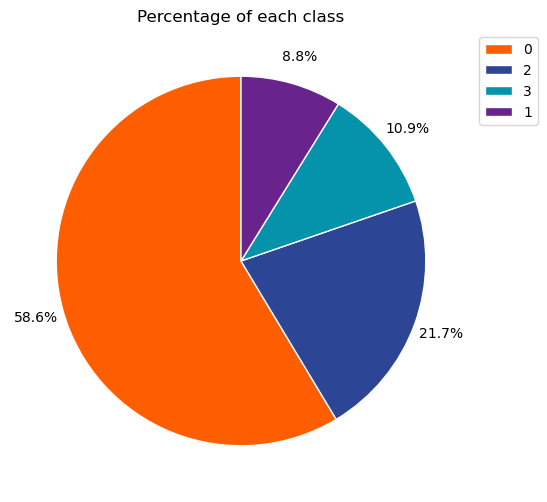

In [95]:
#random.shuffle(df_balanced_count_values)

plt.figure(figsize=(12, 6))
plt.pie(df_balanced_count_values,\
    pctdistance=1.15, autopct='%1.1f%%',\
    startangle=90,\
    wedgeprops = {"linewidth": 1, "edgecolor": "white"},
    colors = {'#b90ddc', '#68248c', '#ff5e00', '#0592ab', '#2c4695'})

plt.title('Percentage of each class')
plt.legend(df_balanced_count_values.index, loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### b. Words pattern in the comments class 1

In [96]:
# Áp dụng hàm find_words cho cột 'comments' và tạo cột mới 'found_words'
df_balanced_1['found_words'] = df_balanced_1['comments'].astype(str).apply(find_words_1)

# Đếm từ trong pattern
word_counts_1 = count_words_in_pattern(df_balanced_1, 'found_words')

print(word_counts_1)

found_words
đéo         195
lồn         169
cặc         148
má          134
địt          93
moẹ          10
cức           9
quần què      7
đụ            6
mịa           5
Name: count, dtype: int64


c:\Users\qkiet\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


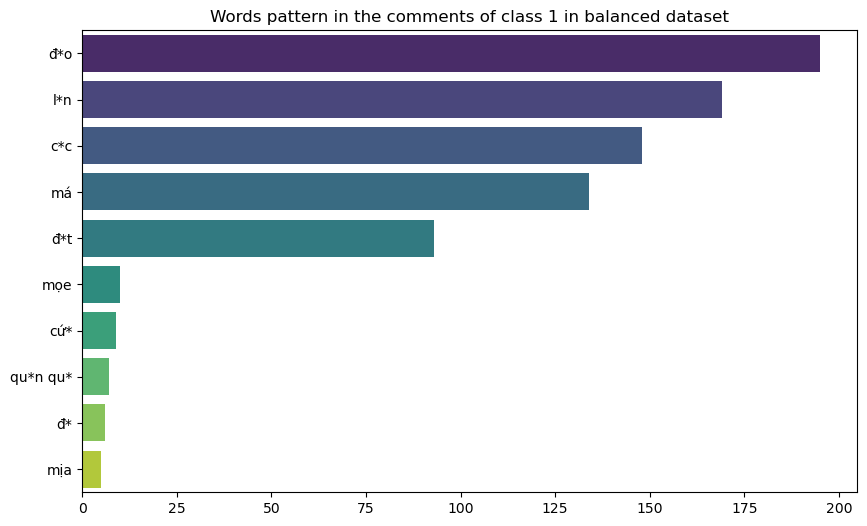

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=word_counts_1.values, y=['đ*o','l*n','c*c','má','đ*t','mọe','cứ*','qu*n qu*','đ*','mịa'], palette='viridis')
plt.title('Words pattern in the comments of class 1')
plt.show()

#### c. Words pattern in the comments class 3

In [98]:
# Áp dụng hàm find_words cho cột 'comments' và tạo cột mới 'found_words'
df_balanced_3['found_words'] = df_balanced_3['comments'].astype(str).apply(find_words_3)

# Đếm từ trong pattern
word_counts_3 = count_words_in_pattern(df_balanced_3, 'found_words')

print(word_counts_3)

found_words
nam kỳ      669
bắc kỳ      284
nam kì       18
bắc kì       14
trung kì      2
Name: count, dtype: int64


In [99]:
word_counts_3['bắc kỳ'] = word_counts_3['bắc kì'] + word_counts_3['bắc kỳ']
word_counts_3['nam kỳ'] = word_counts_3['nam kì'] + word_counts_3['nam kỳ']
word_counts_3 = word_counts_3.drop(['bắc kì', 'nam kì', 'trung kì'])
word_counts_3

found_words
nam kỳ    687
bắc kỳ    298
Name: count, dtype: int64

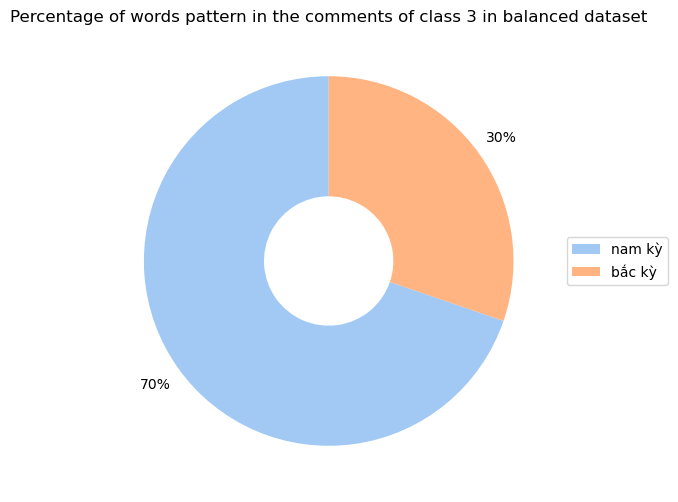

In [100]:
plt.figure(figsize=(10, 6))
plt.pie(word_counts_3, startangle=90, autopct='%1.0f%%', pctdistance=1.15, wedgeprops=dict(width=0.65),colors= sns.color_palette('pastel'))
plt.title('Percentage of words pattern in the comments of class 3')
plt.legend(word_counts_3.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### d. Distribution of length

In [101]:
df_balanced['length'] = df_balanced['comments'].apply(lambda x: len(x.split()))

df_balanced_length =  df_balanced['length'].value_counts()
df_balanced_length

length
5     635
6     581
4     578
7     556
8     523
     ... 
67      5
69      3
66      3
76      1
72      1
Name: count, Length: 68, dtype: int64

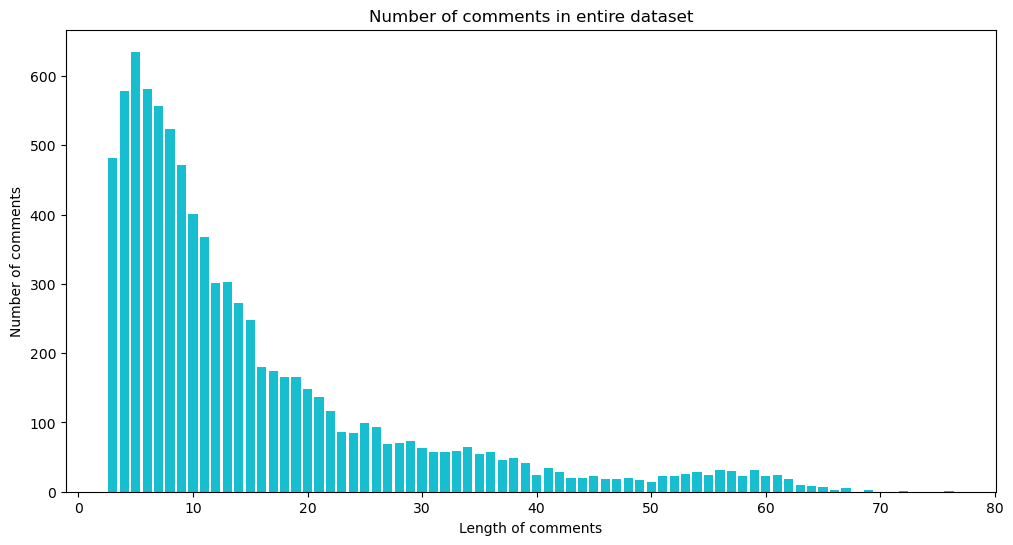

In [102]:
plt.figure(figsize=(12, 6))
plt.bar(df_balanced_length.index, df_balanced_length.values, color='tab:cyan')
plt.title('Number of comments in entire dataset')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.show()

In [103]:
#Tìm số lượng từ trong mỗi comment của từng class
df_balanced_0['length'] = df_balanced_0['comments'].apply(lambda x: len(x.split()))
df_balanced_length_0 =  df_balanced_0['length'].value_counts()

df_balanced_1['length'] = df_balanced_1['comments'].apply(lambda x: len(x.split()))
df_balanced_length_1 =  df_balanced_1['length'].value_counts()

df_balanced_2['length'] = df_balanced_2['comments'].apply(lambda x: len(x.split()))
df_balanced_length_2 =  df_balanced_2['length'].value_counts()

df_balanced_3['length'] = df_balanced_3['comments'].apply(lambda x: len(x.split()))
df_balanced_length_3 =  df_balanced_3['length'].value_counts()

#df_balanced_4['length'] = df_balanced_4['comments'].apply(lambda x: len(x.split()))
#df_balanced_length_4 =  df_balanced_4['length'].value_counts()


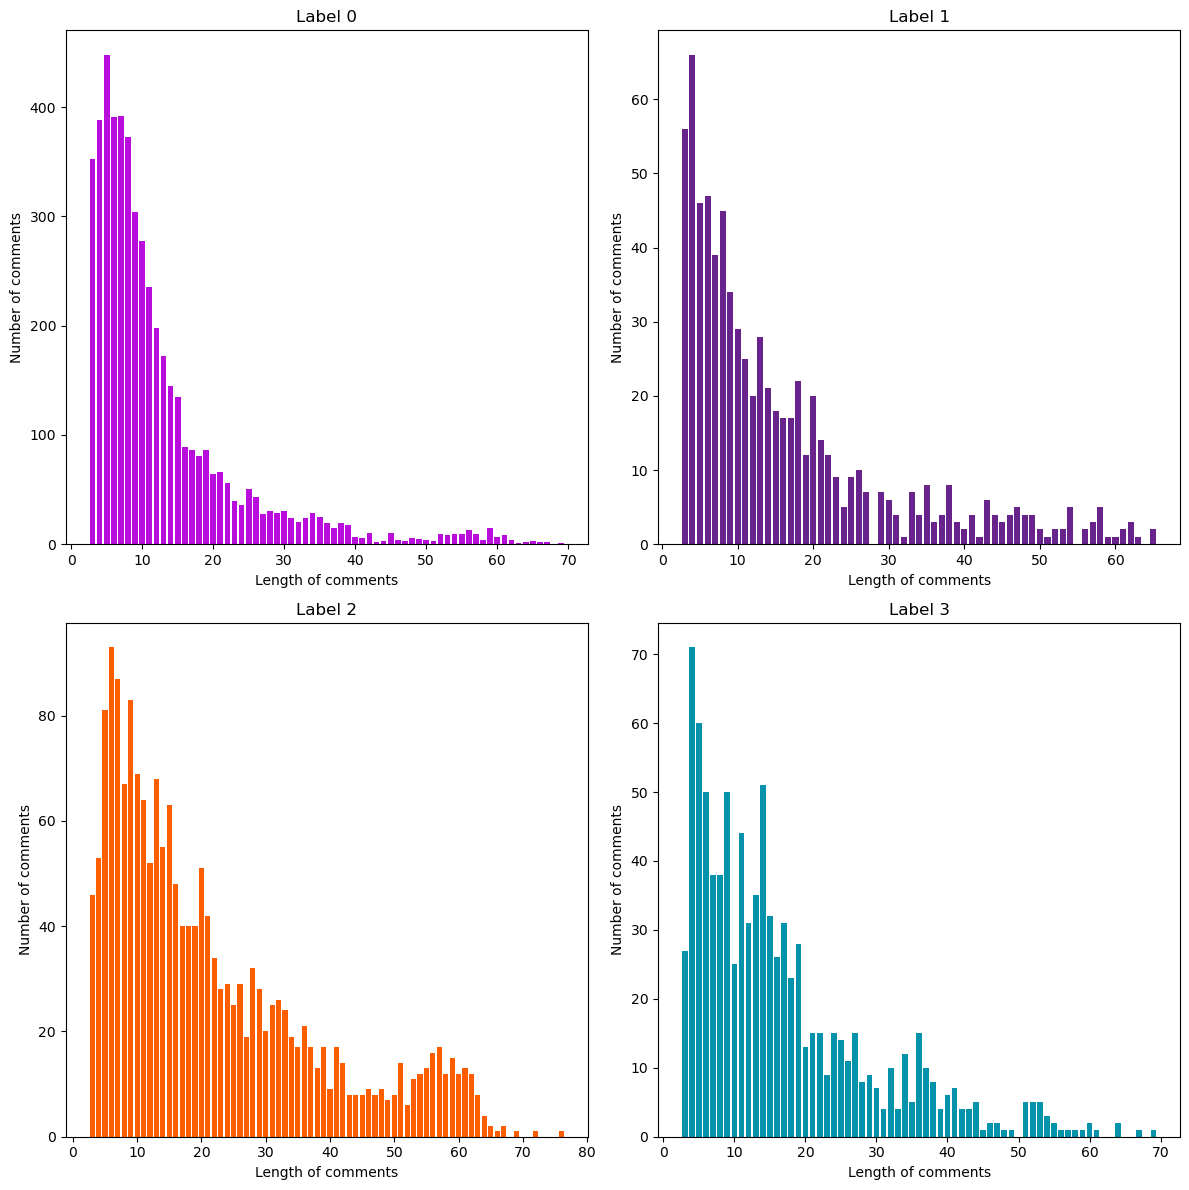

In [104]:
import matplotlib.pyplot as plt

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each bar chart on its own subplot
axs[0, 0].bar(df_balanced_length_0.index, df_balanced_length_0.values, color='#b90ddc')
axs[0, 0].set_title('Label 0')
axs[0, 0].set_xlabel('Length of comments')
axs[0, 0].set_ylabel('Number of comments')

axs[0, 1].bar(df_balanced_length_1.index, df_balanced_length_1.values, color='#68248c')
axs[0, 1].set_title('Label 1')
axs[0, 1].set_xlabel('Length of comments')
axs[0, 1].set_ylabel('Number of comments')

axs[1, 0].bar(df_balanced_length_2.index, df_balanced_length_2.values, color='#ff5e00')
axs[1, 0].set_title('Label 2')
axs[1, 0].set_xlabel('Length of comments')
axs[1, 0].set_ylabel('Number of comments')

axs[1, 1].bar(df_balanced_length_3.index, df_balanced_length_3.values, color='#0592ab')
axs[1, 1].set_title('Label 3')
axs[1, 1].set_xlabel('Length of comments')
axs[1, 1].set_ylabel('Number of comments')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


#### h. Wordcloud of each class

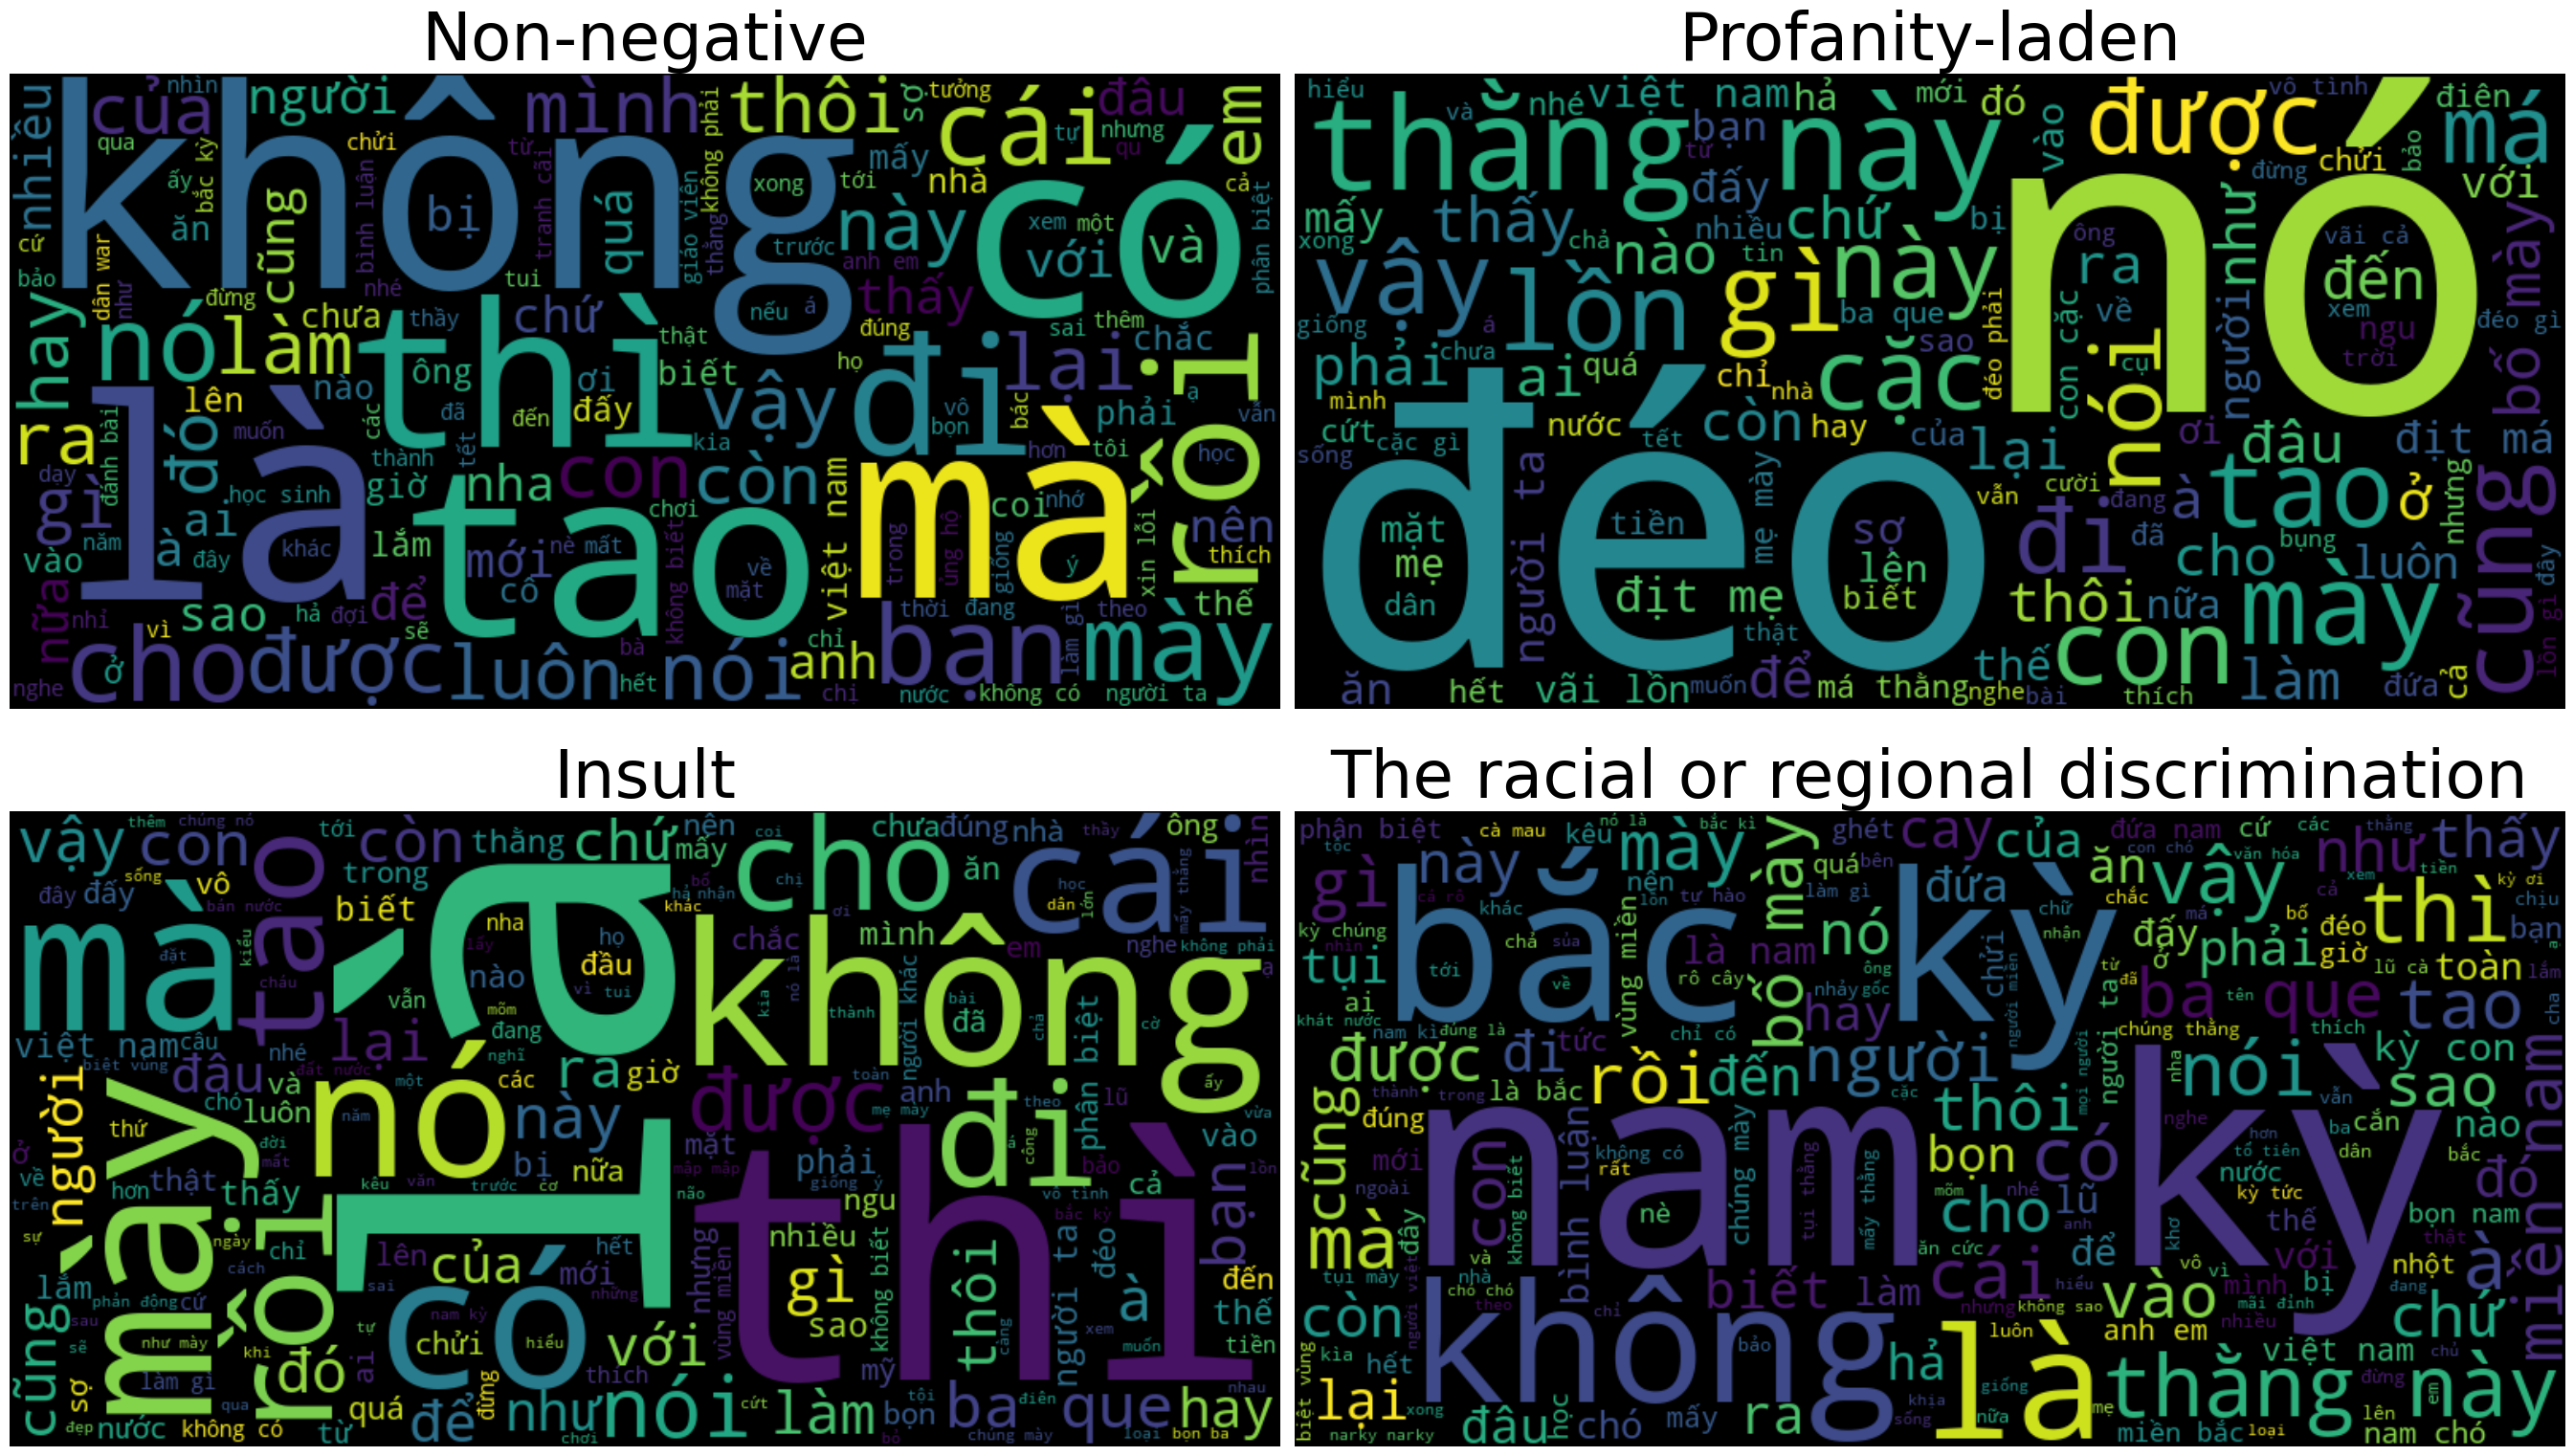

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopwords set for profanity-laden label
stopwords = set(STOPWORDS)
stopwords.update(["username"])
stopwords1 = set(STOPWORDS)
stopwords1.update(["username"], ['không'],['cái'],['là'],['rồi'],['mà'],['thì'],['có'])

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(27, 16))

# Create WordCloud for each label and plot on its own subplot
wordclouds = [
    (df_balanced_0['comments'], 'Non-negative', axs[0, 0], stopwords),
    (df_balanced_1['comments'], 'Profanity-laden', axs[0, 1], stopwords1),
    (df_balanced_2['comments'], 'Insult', axs[1, 0], stopwords),
    (df_balanced_3['comments'], 'The racial or regional discrimination', axs[1, 1], stopwords)
]

for comments, title, ax, stopwords in wordclouds:
    text = " ".join(comments)
    wordcloud = WordCloud(
        width=800, height=400,
        stopwords=stopwords,
        min_font_size=10
    ).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=50, color='black')
    ax.axis("off")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
